In [123]:
# example of correlation feature selection for numerical data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [124]:
def is_str(v):
    for item in v:
        if type(item) is str:
            return True
    return False

In [125]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [126]:
USAtrain = pd.read_csv('./train.csv')
USAtrain = USAtrain.fillna(0)

In [127]:
set(USAtrain['MSZoning'])

{'C (all)', 'FV', 'RH', 'RL', 'RM'}

In [128]:
[x for x in range(len(set(USAtrain['MSZoning'])))]

[0, 1, 2, 3, 4]

In [129]:
for column in list(USAtrain.columns):
    elemset = set(USAtrain[column])
    if is_str(elemset):
        USAtrain[column]=USAtrain[column].replace(list(elemset), [i for i in range(len(elemset))])

In [130]:
USAtrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,1,65.0,8450,0,0,2,0,0,...,0,0,0,0,0,2,2008,0,4,208500
1,2,20,1,80.0,9600,0,0,2,0,0,...,0,0,0,0,0,5,2007,0,4,181500
2,3,60,1,68.0,11250,0,0,1,0,0,...,0,0,0,0,0,9,2008,0,4,223500
3,4,70,1,60.0,9550,0,0,1,0,0,...,0,0,0,0,0,2,2006,0,3,140000
4,5,60,1,84.0,14260,0,0,1,0,0,...,0,0,0,0,0,12,2008,0,4,250000


In [131]:
X = USAtrain.drop(columns = 'SalePrice')
y = USAtrain['SalePrice']

In [132]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [133]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

In [134]:
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 1.089740
Feature 1: 10.145981
Feature 2: 68.483659
Feature 3: 45.654378
Feature 4: 79.623937
Feature 5: 3.096419
Feature 6: 5.291014
Feature 7: 61.333668
Feature 8: 0.655532
Feature 9: 0.321609
Feature 10: 9.450273
Feature 11: 9.373686
Feature 12: 18.430498
Feature 13: 6.186763
Feature 14: 0.502899
Feature 15: 23.679425
Feature 16: 28.359438
Feature 17: 1460.653154
Feature 18: 7.990384
Feature 19: 315.166758
Feature 20: 309.200082
Feature 21: 41.176058
Feature 22: 9.812660
Feature 23: 4.878299
Feature 24: 7.871429
Feature 25: 90.903921
Feature 26: 272.889707
Feature 27: 102.574234
Feature 28: 8.243392
Feature 29: 281.430195
Feature 30: 17.975972
Feature 31: 5.784532
Feature 32: 162.837808
Feature 33: 60.467122
Feature 34: 143.323110
Feature 35: 23.394994
Feature 36: 0.043207
Feature 37: 48.974863
Feature 38: 496.215251
Feature 39: 9.906352
Feature 40: 94.455350
Feature 41: 53.673250
Feature 42: 21.616382
Feature 43: 509.997317
Feature 44: 105.193364
Feature 45: 0.000013
Feat

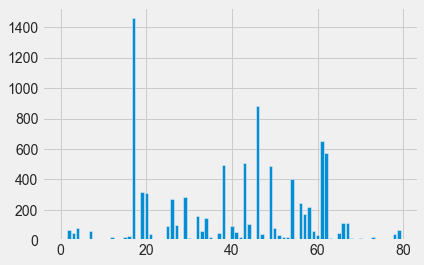

In [136]:
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [139]:
threshold = 100
Featurelist = []
for i in range(len(fs.scores_)):
    if (fs.scores_[i]>threshold):
        Featurelist.append(list(USAtrain.columns)[i])
        print('Feature %s: %f' % (list(USAtrain.columns)[i], fs.scores_[i]))

Feature OverallQual: 1460.653154
Feature YearBuilt: 315.166758
Feature YearRemodAdd: 309.200082
Feature MasVnrArea: 272.889707
Feature ExterQual: 102.574234
Feature Foundation: 281.430195
Feature BsmtExposure: 162.837808
Feature BsmtFinSF1: 143.323110
Feature TotalBsmtSF: 496.215251
Feature 1stFlrSF: 509.997317
Feature 2ndFlrSF: 105.193364
Feature GrLivArea: 882.196380
Feature FullBath: 490.797772
Feature TotRmsAbvGrd: 399.928901
Feature Fireplaces: 248.009575
Feature FireplaceQu: 172.871328
Feature GarageType: 216.517460
Feature GarageCars: 653.752591
Feature GarageArea: 575.950601
Feature WoodDeckSF: 112.932724
Feature OpenPorchSF: 111.159074


In [141]:
print(Featurelist)

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtExposure', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']
